<h1>Unit 8 Live Session </center> </h1>
<h3> W203 Instructional Team </h3>

<h2> Confidence Intervals and Hypothesis Tests </h2>

<img src="https://imgs.xkcd.com/comics/null_hypothesis.png" >

https://xkcd.com/license.html


### 0.1 Class Announcements
1. Announcement 1
2. Announcement 2

<h3> 0.2 Getting to This Document</h3>

If you have not cloned the unit_8_ls repo yet then on the command line

1. git clone https://github.com/w203-spring-19/unit_8_ls_sol.git 

2. cd unit_8_ls_sol



If you have cloned this repo already then on the command line

1. cd unit_8_ls_sol

2. git fetch




<h3> 1 Introduction </h3>

Today we will continue our efforts to develop a framework which will allow for the generalization of the conclusions that we draw from a sample to the larger population. Last week we used the sampling distribution of $\overline{X}_n$ to make the following connection between sample $\{X_i\}_{i=1}^n$ and population parameter $\mu = E(X)$ . 

$$ \text{ $-\infty < E(|X|) < \infty$ } + \text{ $\{X_i\}_{i=1}^n$ is i.i.d } + \text{Law of Large Numbers} = \overline{X}_n \stackrel{p}{\rightarrow} E(X) $$ 

Meaning that under these conditions the value of $\overline{X}_n$ is systematically connected with $E(X)$ and is therefore a good estimator for it. Unfortunately, when we ask the question: 

$$ \text{For a given value of $n$ how close is $\overline{X}_n$ to $E(X)$?} $$ 

The above result is of little help. In order to answer questions like this with any degree of certainty we will have to either know or approximate the sampling distribution of $\overline{X}_n$. In particular we focus our attention on the sampling distribution of $\overline{X}_n$ after it is centered and standardized i.e. 

$$ S_n =  \frac{ \overline{X}_n - E(\overline{X}_n) }{\sqrt{V(\overline{X}_n})} $$

Note that $E(S_n) =0$ and $V(S_n) = 1$


<h4> 1.1 Z Score: When $X$ is Normally Distributed $\sigma$ is Known </h4> 

Suppose $X_1,X_2,...,X_n$ is an i.i.d random sample from a normal distribution with mean $\mu$ and ** known ** standard deviation $\sigma$. Then we know that, 

$$ E(\overline{X}_n) = \mu \;\; \text{ and } \;\; V(\overline{X}_n) = \frac{\sigma^2}{n} $$

So plugging these into $S_n$ and using the properties of the normal distribution.  

$$ Z_{score} = \frac{ \overline{X}_n - \mu}{\sqrt{\frac{\sigma^2}{n}}} \sim N(0,1) $$

This can be easily simulated, first we set up our Z score function 

In [1]:
zscore <- function(x,mu,var,n){(mean(x) - mu)/(sqrt(var/n))}

Now we will simulate 100000 samples of 100 observations from $N(\mu,\sigma^2)$

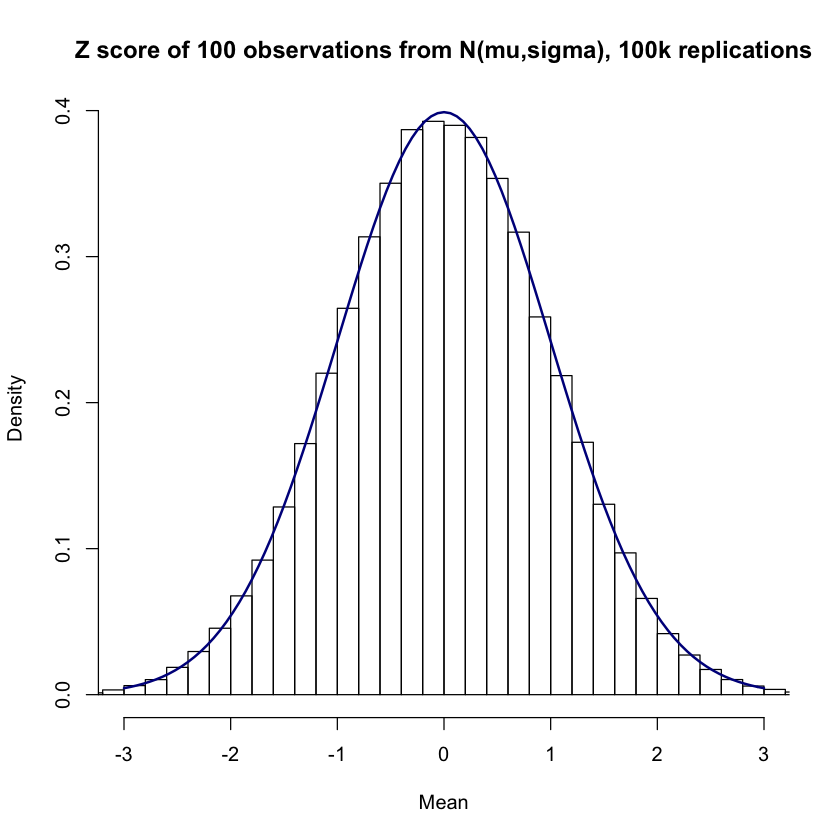

In [2]:
nobs <- 100
mu1 <- 10
sd1 <- 2
obs_rep1 <- replicate(100000, rnorm(nobs,mean = mu1, sd = sd1),simplify = 'array')
z_obs <- apply(obs_rep1 ,2, zscore, mu = mu1, var = sd1^2, n = nobs )
hist(z_obs, breaks = 50, main = "Z score of 100 observations from N(mu,sigma), 100k replications"
                  ,xlim = c(-3,3) , freq = FALSE, xlab = "Mean")
curve(dnorm(x, mean=0, sd=1), 
          col="darkblue", lwd=2, add=TRUE, yaxt="n")

Note that this is only true when we ** know ** the variance of $X$, 

<h4> 1.2 Students t Distribution: When $X$ is Normally Distributed and $\sigma^2$ is Not Known. </h4>

If the variance of $X$ is ** not known ** we will have to provide an estimate of it in the place of $\sigma^2$ in the equation above in order to figure out the sampling distribution of $\overline{X}_n$.

$$ t_{score} = \frac{ \overline{X}_n - \mu}{\sqrt{\frac{s^2}{n}}} \sim t^{(n-1)} \hspace{1cm} \text{where} \hspace{1cm} s^2 = (n-1)^{-1}\sum_{i=1}^n(X_i - \overline{X}_n)^2 \;\;\;  $$

Unfortunately replacing $\sigma^2$ with $s^2$ results in the $t_{score}$ having a distribution which is **not** normal. It has a "Student's t" distribution with $n-1$ degrees of freedom.

The Student's t distribution does however have a strong connection to the normal distribution since. 

$$ t^{n-1} \stackrel{d}{\rightarrow} N(0,1) $$

In [3]:
tscore <- function(x,mu,n){(mean(x) - mu)/(sqrt(sd(x)^2/n))}

Now we will simulate the $t_{score}$ with 100000 samples of 100 observations from $N(\mu,\sigma^s)$

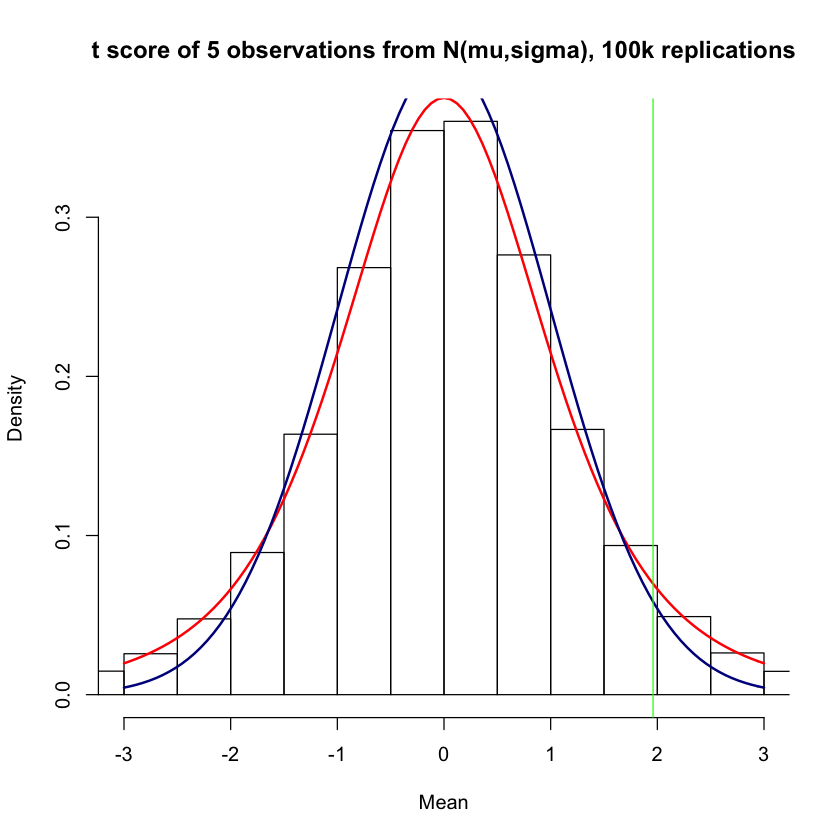

In [4]:
nobs <- 5
mu2 <- 10
sd2 <- 2
df <- 4
obs_rep1 <- replicate(100000, rnorm(nobs,mean = mu2, sd = sd2),simplify = 'array')
t_obs1 <- apply(obs_rep1 ,2, tscore, mu = mu2, n = nobs )


hist(t_obs1, breaks = 200, main = "t score of 5 observations from N(mu,sigma), 100k replications"
                  ,xlim = c(-3,3), freq = FALSE, xlab = "Mean")
curve(dt(x, nobs-1), col="red", lwd=2, add=TRUE, yaxt="n")
curve(dnorm(x, mean=0, sd=1), col="darkblue", lwd=2, add=TRUE, yaxt="n")
abline(v=1.96,col = 'green')

<h4> 1.3 CLT and Students t Distribution: When Both The Distribution and $\sigma^2$ of $X$ are Unknown. </h4>  

Now suppose that $X$ has an unknown distribution which is not normal, what do we do? We have to rely on the CLT to approximate the sampling distribution of $\overline{X}_n$ meaning that if the CLT is satisfied.

$$ S_n = \frac{ \overline{X}_n - \mu}{\sqrt{\frac{\sigma^2}{n}}} \stackrel{d}{\rightarrow} N(0,1)$$

Note that this result relies on knowing $\sigma^2$ so we will use the following chain of logic to approximate the sampling distribution of $\overline{X}$.

1. If $X$ is not normal and $\sigma^2$ is known and $n$ is "large enough" then under the CLT, $S_n$ is approximately normallly distributed. 

2. If $X$ is normal and $\sigma^2$ is unknown, then $t_{score}$ has a Student's t distribution which converges to a $N(0,1)$. 

3. If $X$ is not normal and $\sigma^2$ is unknown, then
   $$ \frac{ \overline{X}_n - \mu}{\sqrt{\frac{s^2}{n}}} \;\; \text{ is approximately distributed } \;\; t^{(n-1)} $$

As we saw in previous weeks in order to justify our conclusion in the last point $n$ must be large enough relative to the skewness of $X$. 

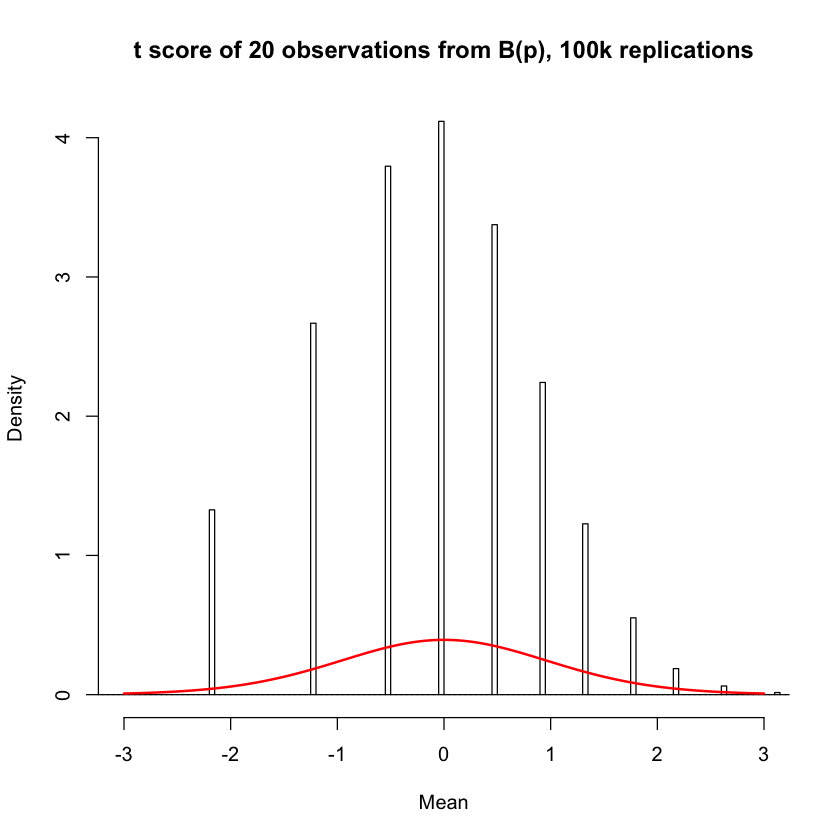

In [5]:
nobs <- 20
p <- 0.25
obs_rep2 <- replicate(100000, rbinom(nobs,1,p),simplify = 'array')
t_obs2 <- apply(obs_rep2 ,2, tscore, mu = p, n = nobs )

hist(t_obs2, breaks = 200, main = "t score of 20 observations from B(p), 100k replications"
                  ,xlim = c(-3,3), freq = FALSE, xlab = "Mean")
curve(dt(x, nobs-1), col="red", lwd=2, add=TRUE, yaxt="n")

<h4> 1.4 Conclusion </h4>

1. If $X$ is normally distributed and the variance is known then use the $Z_{score}$ and normal distribution

2. If $X$ is normally distributed and the variance is unknown then use the $t_{score}$ and student distribution

3. If $X$ is not normally distributed then if $\{X_i\}_{i=1}^n$ is credibly i.i.d and the distribution of $X$ is not too skewed for the number observations use the $t_{score}$ and student distribution.

<h3> 2 Practice with T-Distributions </h3>

In R, we can use the following functions to find the values needed for t-tests. Specifically, we can find the density, distribution function, quantile function and random generation for the t distribution with df degrees of freedom (and optional non-centrality parameter ncp):

dt gives the density, pt gives the distribution function, qt gives the quantile function, and rt generates random deviates. 

** Usage **

dt(x, df, ncp, log = FALSE) 

pt(q, df, ncp, lower.tail = TRUE, log.p = FALSE) 

qt(p, df, ncp, lower.tail = TRUE, log.p = FALSE) 

rt(n, df, ncp) 

** 2.1 ** What is the 2.5th and 97.5th percentiles of the t distribution with 5 degrees of freedom?

In [6]:
tpct <- qt(c(.025, .975), df=5) 
paste('2.5% Percentile: ', tpct[1])
paste('97.5% Percentile: ', tpct[2])


[1] "2.5% Percentile:  -2.57058183563632"

[1] "97.5% Percentile:  2.57058183563631"

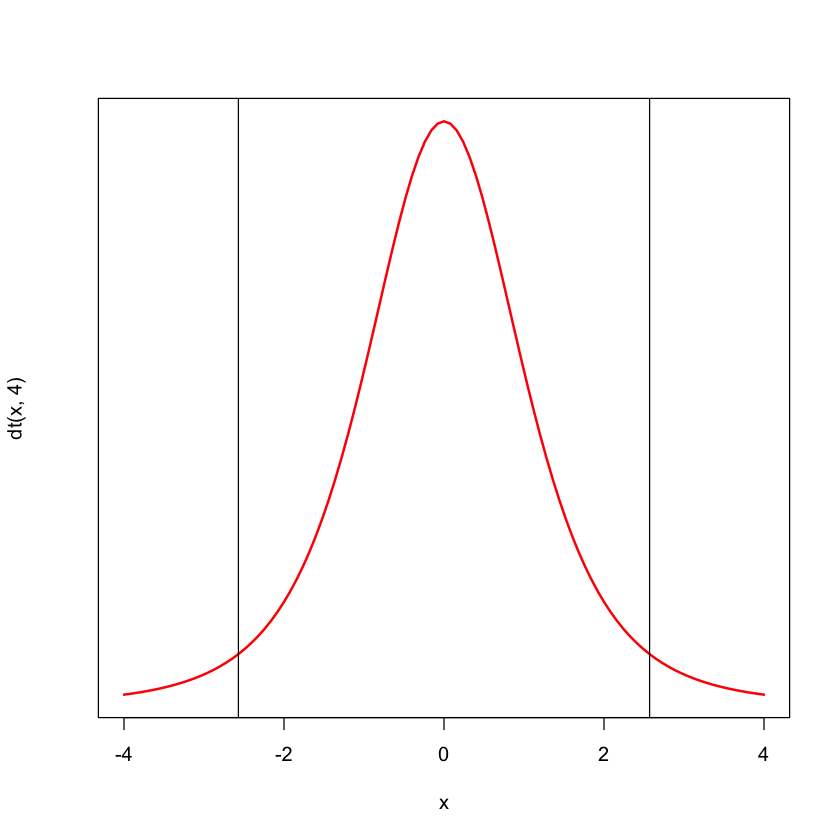

In [7]:
curve(dt(x, 4), from = -4, to = 4, col="red", lwd=2, yaxt="n")
abline(v=-2.57)
abline(v= 2.57)

** 2.2 ** What is the 2.5th and 97.5th percentiles of the t distribution with 1 to 10 degrees of freedom?

In [8]:
 qt(c(.025, .975), df=1:10)   

[1] -12.706205   4.302653  -3.182446   2.776445  -2.570582   2.446912
 [7]  -2.364624   2.306004  -2.262157   2.228139

<h3> 3 P-Values and Confidence Intervals </h3>

In a warehouse full of power packs labeled as 12 volts we randomly measured the voltage of 7 of these: 11.77, 11.90, 11.64, 11.84, 12.13, 11.99, and 11.77. 

** 3.1 ** Find the mean and the standard deviation. 

In [9]:
V<-c(11.77, 11.90, 11.64, 11.84, 12.13, 11.99,  11.77)
vbar <- mean(V)
paste('Sample Mean: ', vbar)
s <- sd(V)
paste('Sample Std Dev: ', s)

[1] "Sample Mean:  11.8628571428571"

[1] "Sample Std Dev:  0.161422250192292"

** 3.2 ** What is the critical value for a 95% confidence interval for this sample?

$$ t^{(n-1)}_{0.95} \;\;\; \text{ is the value such that} \;\;\; P(-t^{(n-1)}_{0.95} < t^{(n-1)} <t^{(n-1)}_{0.95}) = 0.95  $$

In [10]:
c<-abs(qt(0.05/2, length(V)-1))
paste('critical value: ', c )

[1] "critical value:  2.44691185114497"

** 3.3 ** Find the 95% confidence interval for the mean.

$$ (\overline{X}_n -t^{(n-1)}_{0.95}\frac{s}{\sqrt{n}} , \overline{X}_n +t^{(n-1)}_{0.95}\frac{s}{\sqrt{n}} ) $$

In [11]:
sem <- s/sqrt(length(V))
paste('95% Confidence Interval: ','(',vbar-c*sem,',',vbar+c*sem,')')

[1] "95% Confidence Interval:  ( 11.7135664610829 , 12.0121478246314 )"

** 3.4 ** Define a test statistic, that tests whether the mean is 12.

$$ t_{score} = \frac{ \overline{V}_n - \mu}{\sqrt{\frac{s^2}{n}}}  $$

In [12]:
T <- (vbar-12)/(s/sqrt(length(V)))
paste('tscore: ', T)

[1] "tscore:  -2.24780594779606"

** 3.5 ** Calculate the p-value using the t statistic.  Should you reject the null hypothesis?  (Also, could you predict what would happen from your answer to (3)?)

$$\text{Pval of Two Sided Test when Ho:} \; \mu = 12 \;\;\;\; \text{is} \;\;\;\;   2*P\big(t^{(n-1)} <  -|t_{score}|\big)$$

In [13]:
p1 = 2*pt(-abs(T),df=length(V)-1) 
paste('p value: ', p1)

[1] "p value:  0.0656388512825882"

> Since $p>.05$ we fail to reject the null hypothesis.  Note that we could have also gotten the same result as follows:

In [14]:
t.test(V, mu = 12)


	One Sample t-test

data:  V
t = -2.2478, df = 6, p-value = 0.06564
alternative hypothesis: true mean is not equal to 12
95 percent confidence interval:
 11.71357 12.01215
sample estimates:
mean of x 
 11.86286 


** 3.6 ** Suppose you were to use a normal distribution instead of a t-distribution to test your hypothesis.  What would your p-value be for the z-test?

$$\text{Pval of Two Sided Test when Ho:} \; \mu = 12 \;\;\;\; \text{is} \;\;\;\;   2*P\big(Z <  -|t_{score}|\big)$$

In [15]:
p2 = 2*pnorm(-abs(T))
paste('p value: ', p2)

[1] "p value:  0.0245885664488591"

>This time, note that $p<.05$ so we would have rejected the null.  The t-test is more conservative than the z-test.  This example highlights the fact that an unscrupulous researcher might be tempted to use the z-test instead of the t-test in order to get a significant result.  However, since we do not know the population standard deviation, the z-test is invalid.

<h3> 4 Executing t-tests in R </h3>

The file athlet2.Rdata contains data on college football games.  The data is provided by Wooldridge and was collected by Paul Anderson, an MSU economics major, for a term project.  Football records and scores are from 1993 football season.

In [16]:
load("athlet2.RData")

We are especially interested in the variable, dscore, which represents the score differential, home team score - visiting team score.  We would like to test whether a home team really has an advantage over the visiting team.

** 4.1 ** The instructor will assign you to one of two teams.  Team 1 will argue that the t-test is appropriate to this scenario.  Team 2 will argue that the t-test is invalid.  Take a few minutes to examine the data, then formulate your best argument.

> We check to see how many observations we have, as well as the shape of the population distribution of our variable.

[1] "Number of observations:  30"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -33.00  -13.50   -3.00   -1.10    7.75   48.00 

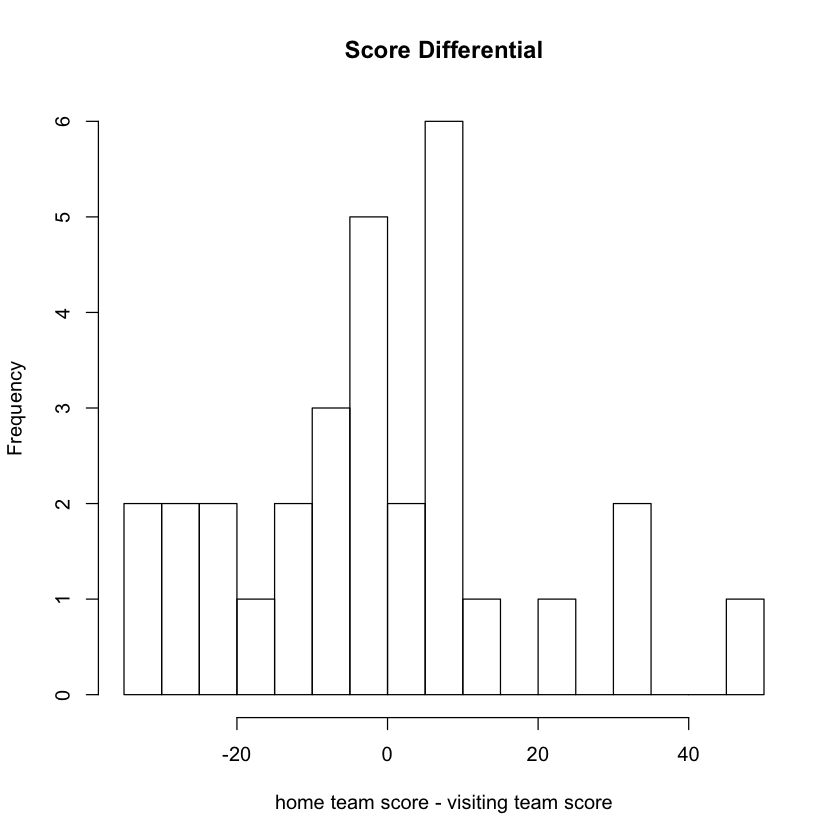

In [17]:
paste('Number of observations: ', length(data$dscore))

summary(data$dscore)
hist(data$dscore, breaks=20,main="Score Differential",
     xlab="home team score - visiting team score")

> Because $n=30$ exactly, we just barely meet the rule-of-thumb requirement for the CLT. In this scenario, you could try to argue that 30 observations might not really be enough to achieve a normal sampling distribution.  However, the histogram of dscore doesn't reveal any substantial skew, which is when we would normally worry about that we need more than 30 observations, so this argument isn't very strong.

> For students arguing that the t-test is invalid, a better approach might be to ask whether the data points are truly independent.  There are only so many college football teams, and it seems likely that each team appears in multiple rows of data.  If a team achieves a high score in one game, it is probably likely to achieve a high score in other games.  This suggests that we may be seeing less variation in our data set than actually exists in the population, and the denominator in our t-statistic will be too small, exaggerating our results.

** 4.2 ** Should you perform a one-tailed test or a two-tailed test?  What is the strongest argument for your answer?

> Even though you are specifically interested in a home team *advantage*, the better answer is to choose the two-tailed test.  There are several reasons for this:

> Your reader may not share your theory that home teams have the advantage and may even believe the opposite.

> The one-tailed test makes it easier to reject the null, but there is no way to prove to your reader that you didn't start with a two-tailed test and then switch to the one-tail once you saw the direction of the effect.  That would be cheating and your type-1 error rate would be greater than .05.  As a result, readers may be suspicious of whether you really committed to the type of test ahead of time.

> Imagine that you select the one-tailed test, but then the data surprises you and you find that the visiting team has a strong advantage.  Suppose the visiting team actually has a 10 point advantage over the home team.  By the rules of hypothesis testing, you can't reject the null, no matter how big the visiting team advantage is.  But would you really pack up your study at this point and say you were unable to find evidence against the null?  Will your reader believe that you'd really do this, and that you wouldn't cheat by switching to the two-tailed test?

** 4.3 ** Execute the t-test and interpret every component of the output.

In [18]:
t.test(data$dscore, mu=0)


	One Sample t-test

data:  data$dscore
t = -0.30781, df = 29, p-value = 0.7604
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -8.408919  6.208919
sample estimates:
mean of x 
     -1.1 


> Make sure you understand every line of the output.

** 4.4 ** Based on your output, suggest a different hypothesis that would have led to a different test result.  Try executing the test to confirm that you are correct.

> The easiest thing to do is to look at the 95% confidence interval.  Since 0 is inside the interval, we already know that the null cannot be rejected.  If we had chosen a null hypothesis outside of this interval, say $mu=7$, it would have been rejected.

<h3> 5 Assumptions Behind the t-test </h3>

** 5.1 ** You have a sample of 50 CEO salaries, and you want to know whether the mean salary is greater than $1 million.

** 5.2 ** A nonprofit organization measures the percentage of students that pass an 8th grade reading test in 40 neighboring California counties.  You are interested in whether the percentage of students that pass in California is over 80%

<h3> 6 Your own T-Test Function </h3>

** 6.1 ** Using your understanding of the procedure for a one-sample t-test, write your own function to execute the test.  You may use the following function header.

In [19]:
my.t.test = function(values , alpha, mu , print) {
  # Mean
  smean = mean(values)
  # Standard Deviation
  sstd  = sd(values)
  # Critical Value
  cr <- abs(qt(alpha/2,df = length(values)-1))
  # Confidence Interval
  conf <- c(smean - cr*sstd/sqrt(length(values)), smean + cr*sstd/sqrt(length(values)))
  # Value of the t^(n-1) statistic
  tval <- (smean - mu)/(sstd/sqrt(length(values)))
  # Probabiliy that a t^(n-1) distirbuted r.v is less than the tval
  pval <- 2*pt(-abs(tval),df = length(values)-1)
  # If pval <= alpha we reject Ho
  if (pval <= alpha) 
  {dec <- "Reject"
   ind <- 0 }
  # If pval > alpha we fail to reject
  else 
  { dec <- "Fail to Reject"
  ind <- 1}
  if (print == 1)
    {print("Confidence Interval:" )
    print(conf)
    print('p-value')
    print(pval)}
    return(dec)
    }

** 6.2 ** Autogenerate a sequence of 20 values and use it as the input of your function. Did you reject or fail to reject the null hypothesis?

In [20]:
# Moments of normally distributed r.v. that I will sample from 
sampsize <- 20
mu <- 0
sampsd <-2 
alpha <- 0.01
# Random Sample
x<- rnorm(sampsize,mean = mu, sd = sampsd)
# A t test for the mean of x where the null hypothesis is true
my.t.test(x,alpha,mu,print = 1)

[1] "Confidence Interval:"
[1] -1.114906  1.818708
[1] "p-value"
[1] 0.5007736


[1] "Fail to Reject"

** 6.3 ** How can you test that the function we created works properly?  

> You can run it against a known bench mark, but suppose we wanted to test it by simulation. Suppose we defined the following random variable. 

$$
D_i =  \begin{cases} 0  \;\;\; \text{ if the test fails to reject $H_o$ when $H_o$ is true } \\ 1 \;\;\; \text{ if the test rejects $H_o$ when $H_o$ is true } \end{cases} 
$$

> Then $E(D_i) = P(\text{ Test Rejects } H_o \; | \; H_o \text{ is true }) = \alpha = P(\text{Type I Error})$ so we will take several random samples $\{D_i\}_{i=1}^n$ of a given length and plot the distribution of the proportion of tests which committed a type 1 error, and the mean of this should be very close to $\alpha$.  

> First I write function to carry out the simulation


In [21]:
t_sim <- function(sampsize,mu,sampsd,alpha,nloops,num_tests){
  full <- NULL
  test <- NULL 
  for (j in 1:nloops) {
      for (i in 1:num_tests ){
          x <- my.t.test(rnorm(sampsize,mean = mu, sd = sampsd),alpha,mu,print = 0)
          if (x == "Fail to Reject")
          {test[i] <- 0}
          else
          {test[i] <- 1 }
        }
      full[j] <- mean(test)
  }
  return(full)
}

> Now we try it with 10 tests or observations from $D_i$ per loop.

[1] "Mean Proportion of Tests Rejected in  10 tests: 0.0514"

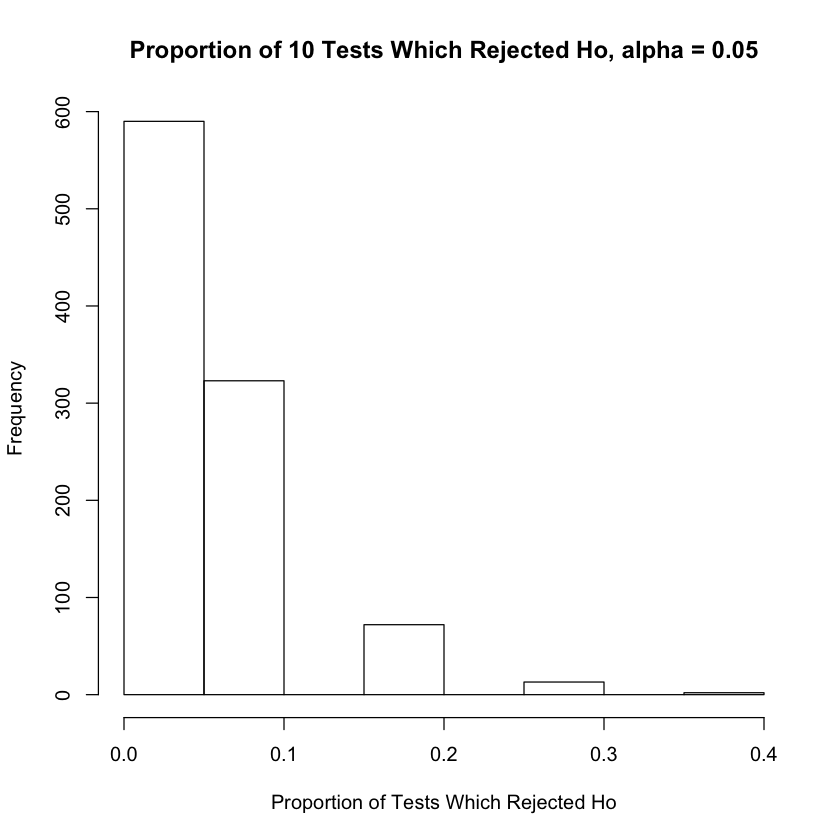

In [22]:
sampsize <- 10
mu <- 0
sampsd <-2 
alpha <- 0.05
nloops <- 1000
num_tests <- 10
x <- t_sim(sampsize,mu,sampsd,alpha,nloops,num_tests) 
paste('Mean Proportion of Tests Rejected in ', num_tests , 'tests:', mean(x))
hist(x, breaks = 10, main = paste( "Proportion of"
     , num_tests,"Tests Which Rejected Ho, alpha =", alpha)
     , xlab = "Proportion of Tests Which Rejected Ho", freq = NULL)

> Now we try it with 100 tests .

[1] "Mean Proportion of Tests Rejected in  100 tests: 0.04995"

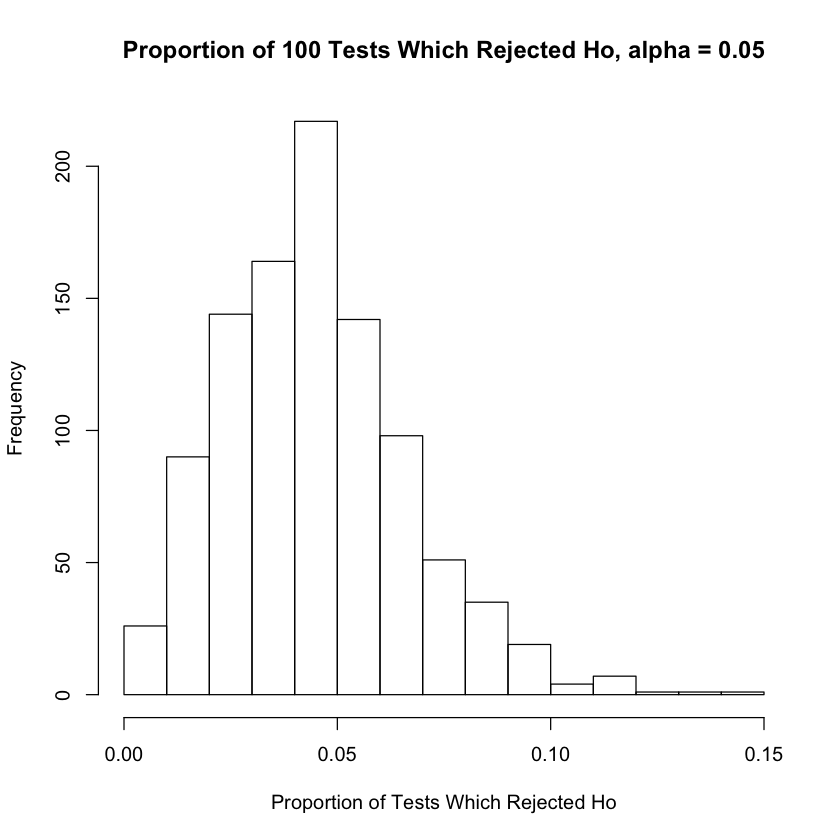

In [23]:
num_tests <- 100
x <- t_sim(sampsize,mu,sampsd,alpha,nloops,num_tests) 
paste('Mean Proportion of Tests Rejected in ', num_tests , 'tests:', mean(x))
hist(x, breaks = 15, main = paste( "Proportion of"
      , num_tests,"Tests Which Rejected Ho, alpha =", alpha)
      , xlab = "Proportion of Tests Which Rejected Ho", freq = NULL)

> And lastly with 1000 tests.

[1] "Mean Proportion of Tests Rejected in  1000 tests: 0.050295"

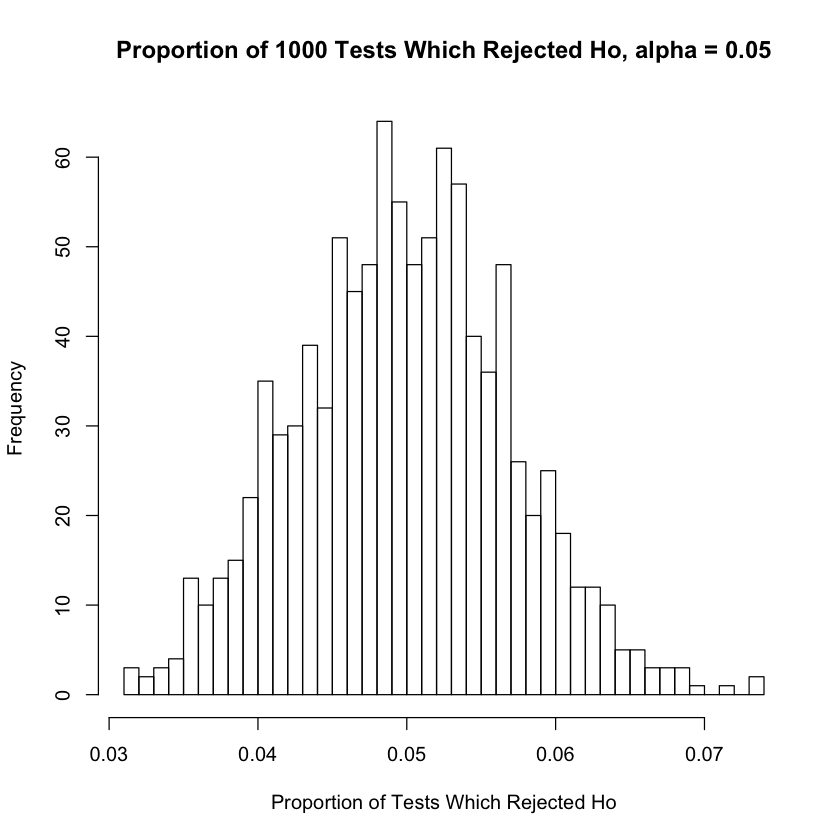

In [24]:
num_tests <- 1000
x <- t_sim(sampsize,mu,sampsd,alpha,nloops,num_tests) 
paste('Mean Proportion of Tests Rejected in ', num_tests , 'tests:', mean(x))
hist(x, breaks = 50, main = paste( "Proportion of"
      , num_tests,"Tests Which Rejected Ho, alpha =", alpha)
      , xlab = "Proportion of Tests Which Rejected Ho", freq = NULL)